# Computational Quantitative Finance - Summative Assessment

### Introduction:

The Black-Scholes model (also known as the Black-Scholes-Merton model) is a Nobel Prize winning mathematical model describing financial markets containing derivative products. Using this model we can obtain the Black-Scholes formula which can be used to accurately price Eurpoean-style option contracts. By the end of this report we will have discussed the Black-Scholes option pricing model extensively, including: an outline of the model including its limitations, a derivation of the Black-Scholes equation and hence formula, the different ways to apply it (i.e. Explicit or with Monte-Carlo) and how to code these models using Python. We will also discuss extensions to the Black-Scholes model and examine how to input these into Python before reaching the report's conclusion.

### Black-Scholes Model:

The Black-Scholes model is heavily theoretical and therefore not so applicable in real scenarios. The model itself is based on a number of assumptions that are not realistic, which is where we come across limitations of the model:

- The first assumption of this model is that stock price movements follow a Geometric Brownian Motion, meaning that potentially considerable price swings, which often occur in the real world, are ignored. This variation can cause options to be substantially mispriced under the Black Scholes model, but many argue that by using a variation of a Jump-Diffusion we can extend the model to account for such swings (see Extension 2).

- Secondly, the model also assumes that the underlying asset the contract is written on does not pay dividends, which disregards the impact that dividends have on the change in option valuations. This has been later fixed by extending the model, by subtracting the discounted value of a future dividend from stock prices. (see Extension 1).

- Another assumption is that of constant volatility of the underlying asset price process and constant risk-free rate of return. These values are highly unlikely to remain constant in the real world, which brings the model into disrepute.

- Under the rules of the Black-Scholes world, a significant assumption is that there are no transaction costs to buy and sell the options. While this is not yet feasible in the real world, as stock brokers charge for their services, transaction costs are decreasing steadily due to competition between financial institutions (see articles on Charles Schwab zero-fee trading, 2019). 

- Finally, while the BS model is the only close form solution for pricing European options, it is not suitable for pricing American-style options. This is because in order to follow this theory, we assume that options do not allow for early exercise - a prominent feature of American-style options.

Now that we have discussed the limitations of the model, we will derive the Black-Scholes equation (leading to the Black-Scholes formula) in order to continue our report:

##### Derivation:

We must start with the Geometric Brownian Motion model for the asset price St:

\begin{align} dS_t = (μ + \frac{1}{2σ^2})S_{t}dt + σS_{t}dW_t \end{align}

where µ = drift parameter for Xt = log St, σ = volatility
parameter. 

If we now denote the value of an option contract by Itô's lemma (based on underlying asset 'St'), we have:

\begin{align} dV_t = \frac{𝛿V_t}{𝛿t}dt + \frac{𝛿V_t}{S_t}dS_t + \frac{1}{2}\frac{𝛿^2V_T}{𝛿S_t^2}σ^2S_t^2dt \end{align}

Now if we build a portfolio defined by:

\begin{align} Π_t := V_t - ∆_tS_t \end{align}

Meaning that we go long (buy) one unit of option 'Vt' and go short (sell) '∆t' units of asset 'St'. This leaves us with the following in the differential form:

\begin{align} dΠ_t = dV_t - ∆_tdS_t \end{align}

If we now plug our Vt equation into our portfolio, we form our total differential equation for 'Πt' :

\begin{align} dΠ_t = \frac{𝛿V_t}{𝛿t}dt + \frac{𝛿V_t}{S_t}dS_t + \frac{1}{2}\frac{𝛿^2V_T}{𝛿S_t^2}σ^2S_t^2dt - ∆_tdS_t \end{align}

If we rewrite this equation we can split it into two terms - a 'risk-free' term 'dt', and a 'risky' term 'dSt':

\begin{align} dΠ_t = (\frac{𝛿V_t}{𝛿t} + \frac{1}{2}\frac{𝛿^2V_t}{𝛿S_t^2}σ^2S_t^2)dt + (\frac{𝛿V_t}{S_t} - ∆_t)dS_t \end{align}

If we assume that we are operating in a costless/fractionless and liquid market, we can allocate the portfolio weight '∆t' continuously. Following from this, if we assume that:

\begin{align} ∆_t = \frac{𝛿V_t}{𝛿S_t} \end{align}

we can make the portfolio risk-free:

\begin{align} dΠ_t = (\frac{𝛿V_t}{𝛿t} + \frac{1}{2}\frac{𝛿^2V_t}{𝛿S_t^2}σ^2S_t^2)dt \end{align}

Now given that we have a riskless portfolio, the no-arbitrage condition (no way to increase gains without taking on more risk) gives that:

\begin{align} dΠ_t = rΠ_tdt \end{align}

By inserting equations for 'dΠt' and 'Πt' into this, we have:

\begin{align} (\frac{𝛿V_t}{𝛿t} + \frac{1}{2}\frac{𝛿^2V_t}{𝛿S_t^2}σ^2S_t^2)dt = r(V_t - ∆_tS_t)d_t \end{align}

and by cancelling 'dt' for both sides while plugging in '∆t = 𝛿Vt/𝛿St' we end up with what is commonly referred to as:

##### The Black-Scholes Equation:

#####             \begin{align} \frac{𝛿V_t}{𝛿t} + \frac{1}{2}\frac{𝛿^2V_t}{𝛿S_t^2}σ^2S_t^2= rV_t - r\frac{𝛿V_t}{𝛿S_t}S_t \end{align}


Now, if we solve the stochastic differential equation for the above, we derive the formula that we will be referring to throughout this assignment: The Black-Scholes formula. There are multiple ways that we can derive this formula, including using integration, applying the Feynman-Kac theorum and even using the CAPM, but each of these methods will yield the same result:

##### The Black-Scholes Formula: 
#### \begin{align} V_{(S,t)} = S_tN(d_1) - Ke^{-r(T-t)}N(d_2) \end{align}


where             \begin{align} d_1 = d_2 + σ√(T − t) \end{align}
#####              \begin{align} d_2 = \frac{log(\frac{S_t}{K}) + (r − \frac{σ^2}{2})(T − t)}{σ√(T − t)} \end{align}

The Black-Scholes formula, displayed above, can be used to determine the price of an option contract using multiple known variables: 

St = spot price, 
K = strike price, 
T = time to maturity, 
r = the risk free rate, 
σ = volatility of underlying asset returns.

We can see how this translates to Python below:

##### Black-Scholes Explicit Option Pricing:

In [7]:
import numpy as np
from scipy.stats import norm

S0 = 860
K = 860
T = 1
r = 0.0014
sig = 0.20

d2 = (np.log(S0/K)+(r-sig**2/2)*T)/(sig*np.sqrt(T))
d1 = d2 + sig*np.sqrt(T)

V = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

print(V)

69.05921132899181


The lines of code above give us an example of the Black-Scholes model using explicit pricing. At the end of the code we can see the Black-Scholes formula we derived, including the equations for d1 and d2, and the code's output is the price given by this formula.

While using an explicit method like this can be the best option, we can integrate a Monte-Carlo simulation into the Black-Scholes model to create a new method of option pricing based on random sampling:

##### Black-Scholes Monte-Carlo Option Pricing:

In [39]:
import scipy as sp
import matplotlib.pyplot as plt

S0 = 860
K = 860
T = 1
r = 0.0014
sig = 0.20

N = 1000
# Number of Brownian Motions
dt = 1/N
n_path = 100

t = sp.linspace(0, T, N*T+1)
# timeline
S = sp.zeros((N*T+1, n_path))
# add S to matrix (of zeros) with N*T+1 rows
# require two brackets for matrix, outside for ' ', inside for dimensions

for i in range(n_path):
    x = sp.random.standard_normal(N*T)*sp.sqrt(dt)
    # generates standard normal returns
    W = sp.append(0, x.cumsum())
    # Standard Brownian Motion
    X = sp.log(S0) + (r-0.5*sig*sig)*t + sig*W
    # capital X is log price with drift ((r-0.5*sig*sig)*t) and jump (sig*W)
    S[:, i] = sp.exp(X)
    # S is our matrix
    payoff = (S[-1, :]-K).clip(min=0)
    # the -1 is the last value, clip function is for positive value
    
V = sp.mean(sp.exp(-r*T)*payoff)
# following the BS formula
print(V)


67.37142372952944


By using Monte-Carlo expectations and a Brownian Motion generator we can write code sophisticated enough to output a Black-Scholes option price based on random sampling (the basis of a Monte-Carlo simulation).

### Extension 1: Black-Scholes Pricing Model for Dividend Paying Options

For assets that pay dividends the Black-Scholes formula changes very slightly by introducing a new parameter 'q' to represent the dividend rate of the asset. For this extension we have the following known variables:

St = spot price, 
K = strike price, 
T = time to maturity, 
r = the risk free rate, 
σ = volatility of the asset,
q = dividend rate of the asset

We assume that the underlying asset in this case pays dividends at a continuous rate.

##### The Black-Scholes Formula with Dividends: 
#### \begin{align}  V_{(S,t)} = Se^{-q(T-t)}N(d_1) - Ke^{-r(T-t)}N(d_2) \end{align}

##### where             \begin{align} d_1 = \frac{ln(\frac{S}{K}) + (r - q + \frac{σ^2}{2})(T-t)}{σ√(T − t} \end{align}
#####              \begin{align} d_2 = d_1 - σ√(T − t) = \frac{ln(\frac{S}{K}) + (r - q - \frac{σ^2}{2})(T-t)}{σ √(T − t)} \end{align}

Above we see the altered Black-Scholes equation with the addition of the 'q' variable to account for continuous paying dividends. Now that we have our mathematical foundation for this extension we can use it to code our new extended model in Python.

##### Black-Scholes Explicit Option Pricing with Dividends:

In [62]:
import numpy as np
from scipy.stats import norm

def BS_EP_div(S0, K, T, r, q, sig):
    d1 = ((np.log(S0 / K) + (r - q + (sig ** 2)) / 2) * T) / (sig * np.sqrt(T))
    d2 = d1 - (sig * np.sqrt(T))
    
    V = (S0 * np.exp(-q * T) * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
    
    return V

In [64]:
S0 = 860
K = 860
T = 1
r = 0.0014
q = 0.002
sig = 0.20

print(BS_EP_div(S0, K, T, r, q, sig))

68.13019379278961


Coding an explicit pricing model for assets paying dividends simply requires us to add parameter 'q' into the equation and change our value equation from 'V = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)' to '    V = (S0 * np.exp(-q * T) * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))'. This change represents the stock price being discounted due to dividend payments and the option price we are left with reflects this.

##### Black-Scholes Monte Carlo Option Pricing with Dividends:

In [73]:
import scipy as sp
import matplotlib.pyplot as plt
    
def BS_MC_div(S0, K, T, r, q, sig):
    N = 1000
    dt = 1/N
    n_path = 100

    t = sp.linspace(0, T, N+1)
    S = sp.zeros((N+1,n_path))
    for i in range(n_path):
        x = sp.random.standard_normal(N)*sp.sqrt(dt)
        W = sp.append(0, x.cumsum())
        X = (sp.log(S0)*np.exp(-q*T)) + (r-0.5*sig*sig)*t + sig*W
        S[:, i] = sp.exp(X)
        payoff = (S[-1, :]-K).clip(min=0)

    V = sp.mean(sp.exp(-r*T)*payoff)
    return V

In [79]:
S0 = 860
K = 860
T = 1
r = 0.0014
q = 0.002
sig = 0.20

print(BS_MC_div(S0, K, T, r, q, sig))

62.03272187189217


Now when coding this extension using a Monte-Carlo simulation we actually leave the value equation unchanged, but instead change one of the variables that makes up the equation - payoff. By altering the equation for X from:

In [120]:
X = sp.log(S0) + (r-0.5 * sig * sig) * t + sig * W

# to

X = (sp.log(S0) * np.exp(-q * T)) + (r-0.5 * sig * sig) * t + sig * W

we change the stock price calculation which we use to calculate our payoff matrix. Our payoff matrix will now represent assets paying continuous dividends, and the value equation need not be touched.

### Extension 2: Merton Jump-Diffusion Model

The large 'jumps' we observe in stock prices cannot be modelled using only a Geometric Brownian Motion. In order to generate such large returns, we must use a more comprehensive model: Merton Jump-Diffusion. This model consists of a jump component - a compound Poisson process - superimposed onto a diffusion component - a Geometric Brownian Motion. We will now derive an equation for this model, but before writing our equation, we must first recall that St is the stock price at time t, and that:

#### \begin{align} X_t = log(S_t) \end{align}

So that:

\begin{align} dX_t = \frac{dS_t}{S_t} \end{align}

The Merton Jump-Diffusion model can therefore be written as:

#### \begin{align}  X_t = µ_t + σW_t + P_{t}J_{t} \end{align}

where µ = drift parameter, σ = volatility parameter, Pt is the Poisson process and Jt is our normal jump size random variable. We can write this in its stochastic differential equation form as seen below:

\begin{align} dX_t = dµ_t + σdW_t + dP_{t}J_t \end{align}

and by solving this for St we come to obtain:

\begin{align} S_t = S_{0}e^{µ_{t}+ σdW_{t}}U(P_t) \end{align}

It is this equation that shows us that by extending the Black-Scholes model to incorporate the Merton Jump-Diffusion model, we have to alter how we calculate stock price within the model. Below we can see an example of this model coded using Python:

##### Merton Jump Diffusion Model:

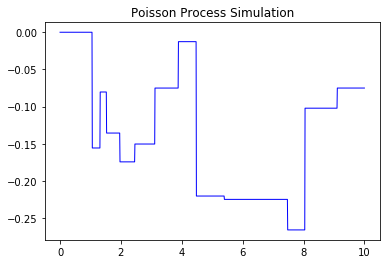

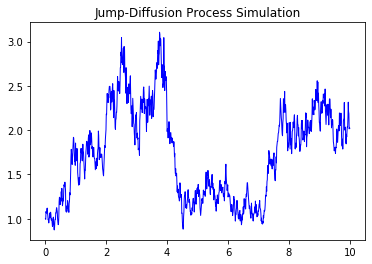

In [5]:
import scipy as sp
import matplotlib.pyplot as plt

N = 100
T = 10
dt = 1/N
t = sp.linspace(0, T, N*T+1);

mu = 0.05
sig = 0.5
lam = 1
sig_J = 0.1

W = sp.zeros(N*T+1)
W[1:(N*T+1)] = sp.cumsum(sp.sqrt(dt)*sp.random.standard_normal(N*T))

p = lam/N
H = sp.random.binomial(1, p, N*T+1) * sp.random.normal(0, sig_J, N*T+1)
J = H.cumsum()

X = mu*t + sig*W + J
S = sp.exp(X)

fig, ax = plt.subplots()
ax.plot(t, J, 'b-', linewidth = 1)
ax.set_title('Poisson Process Simulation')
plt.show()

fig, ax = plt.subplots()
ax.plot(t, S, 'b-', linewidth = 1)
ax.set_title('Jump-Diffusion Process Simulation')
plt.show()

What we can see above is a simulation of the Merton Jump-Diffusion model with a view to present in graphical form. The 2 graphs we see outputted above show us a simulation of a compound Poisson process, or our 'jump' component (graph 1) followed by a simulation of our complete jump-diffusion model (graph 2). In order for us to incorporate this model as an extension for Black-Scholes in Python, we must use the altered calculation for Xt below:

In [ ]:
X = mu * t + sig * W + J

to alter our old code: 

In [ ]:
X = (sp.log(S0) * np.exp(-q * T)) + (r-0.5 * sig * sig) * t + sig * W

##### Merton Jump-Diffusion with Black-Scholes:

In [56]:
import scipy as sp
import matplotlib.pyplot as plt

def BS_MJD(S0, K, T, r, sig, mu, lam, sig_J):
    N = 1000
    dt = 1/N
    n_path = 100

    t = sp.linspace(0, T, N+1)
    S = sp.zeros((N+1,n_path))

    W = sp.zeros(N*T+1)
    W[1:(N*T+1)] = sp.cumsum(sp.sqrt(dt)*sp.random.standard_normal(N*T))
    
    for i in range(n_path):
        x = sp.random.standard_normal(N)*sp.sqrt(dt)
        p = lam/N
        H = sp.random.binomial(1, p, N*T+1) * sp.random.normal(0, sig_J, N*T+1)
        J = H.cumsum()
        W = sp.append(0, x.cumsum())
        X = sp.log(S0) + mu*t + sig*W + J
        S[:, i] = sp.exp(X)
        payoff = (S[-1, :]-K).clip(min=0)

    V = sp.mean(sp.exp(-r*T)*payoff)
    return V

In [122]:
S0 = 860
K = 860
T = 1
r = 0.0014
sig = 0.20
mu = 0.05
lam = 1
sig_J = 0.1

print(BS_MJD(S0, K, T, r, sig, mu, lam, sig_J))

103.80593167790292


Not unlike how we coded our previous extension for Monte-Carlo, we have started by defining our new output, this time as BS_MJD (standing for Merton Jump-Diffusion). We continue as if still using the previous model, however, there are a number of new parameters involved in this extension in order to accurately calculate the option value under this model (mu, lam, sig_J). We use a 'for' loop just as before, but in addition tox, W, X, S and payoff we also define p, H and J before altering our equation for X:

In [ ]:
X = sp.log(S0) + mu * t + sig * W + J

This new equation alters our payoff matrix, which in turn effects the value equation as we use this matrix to calculate our final option value.

### Conclusion:

To conclude this report, the Black-Scholes model offers an ingenious solution to the problem of pricing options contracts, but it is not without faults. Due to its multiple unrealistic assumptions, the model fails to wholly replicate reality and hence does not give a true and fair value of these contracts. In reality, we use Monte-Carlo simulations to estimate the movements in stock prices via random sampling, but in order to improve upon the actual theory we must extend it to tackle its unrealistic assumptions. We examined two of these extensions in detil above, but other possible extensions include: implied volatility, asian options and the volatility smile. With the many developments built upon the 1973 theory, option pricing is now more comprehensive and accurate than ever before.

##### References:

Black F., and Scholes M. (1973) "The Pricing of Options and Corporate
Liabilities." Journal of Political Economy, Vol 8

Merton R. C. (1976) "Option pricing when underlying stock returns are discontinuous" Journal of Financial Economics, Vol 3

Rouah F. D. "Four Derivations of the Black-Scholes Formula" accessed 08/12/19 at "http://www.frouah.com/finance%20notes/Black%20Scholes%20Formula.pdf"

Schlegel A. (2018) "Black-Scholes Formula and Python Implementation" accessed 04/12/19 at "https://aaronschlegel.me/black-scholes-formula-python.html"

Yalincak H. (2012) "Criticism of the Black-Scholes Model: But Why is it Still Used?: (The Answer is Simpler than the Formula)" SSRN Electronic Journal.

Zhou B. (2019) "Lecture I & II: Stochastic Processes"

Zhou B. (2019) "Lecture III & IV: Option Pricing"
